### NOTE: Considering the confidentiality of the data, some output of the data has been cleared.

## Importing Libraries

**Import libraries for data preprocessing and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline  #feature scaling

**Import libraries for model implementation and evaluation**

In [2]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile  #feature selection
from sklearn.model_selection import train_test_split  #split dataset
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from xgboost import XGBRegressor
from keras.models import Sequential
from keras import layers
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.simplefilter("ignore")

## Load Dataset

**Load dataset as DataFrame**

In [3]:
#Load dataset as DataFrame from located path
df = pd.read_csv('train_bank_data.csv')

**List first five rows of dataframe**

In [ ]:
df.head() #List first five rows of DataFrame

**Show row and column size**

In [5]:
df.shape #Show the dataset shape

(151532, 18)

## Understanding and Preprocessing

**Using some inbuilt attributes of pandas to understand dataset more**

In [6]:
df.info() #Gives overview about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151532 entries, 0 to 151531
Data columns (total 18 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Instrument                                       151532 non-null  int64  
 1   Instrument Type                                  151532 non-null  object 
 2   Instrument Subtype                               151500 non-null  object 
 3   Counterparty Alias                               151532 non-null  object 
 4   MTM Exposure                                     151532 non-null  float64
 5   Book Exposure                                    151532 non-null  float64
 6   1-Year Likelihood                                151532 non-null  float64
 7   Severity Used                                    151532 non-null  float64
 8   Industry Alias                                   151532 non-null  object 
 9   Commitment     

**List statistic of numerical columns**

In [7]:
df.describe()

,Instrument,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
count,151532.000000,1.515320e+05,1.515320e+05,151532.000000,151532.000000,1.515320e+05,151532.000000,1.515320e+05,151532.000000,151532.000000,151532.000000,151532.000000
mean,83299.863382,2.751994e+05,2.661031e+05,0.061460,0.081395,2.756334e+05,7.166776,1.628697e+04,0.056623,0.275837,0.340772,0.082499
std,48078.750392,1.530886e+06,1.495449e+06,0.129754,0.180296,1.531410e+06,7.423330,1.657304e+05,0.134575,0.022782,0.009948,0.026737
min,1.000000,6.300000e-02,6.000000e-02,0.000225,0.009500,6.000000e-02,0.002738,-1.663000e+01,-0.000123,0.192410,0.154790,0.040000
25%,41641.750000,3.151405e+04,2.956708e+04,0.014400,0.009500,3.158485e+04,1.336071,4.247775e+02,0.008701,0.267060,0.341090,0.054900
50%,83361.500000,9.000000e+04,8.422523e+04,0.020700,0.019000,9.000000e+04,4.002738,2.395550e+03,0.028426,0.267060,0.341090,0.086000
75%,124934.250000,2.305225e+05,2.250000e+05,0.062550,0.057000,2.307162e+05,11.835729,8.969438e+03,0.060078,0.267060,0.341090,0.107700
max,166532.000000,2.475000e+08,2.475000e+08,1.000000,0.817000,2.475000e+08,79.427789,3.345287e+07,2.834707,0.592470,0.642590,0.650000


**List descriptive statistic of categorical columns**

In [8]:
df.describe(include='object') 

,Instrument Type,Instrument Subtype,Counterparty Alias,Industry Alias,Country of Incorporation,Maturity Date
count,151532,151500,151532,151532,151532,151532
unique,2,2,56917,40,1,4562
top,Loan,Term Loan Amortizing,C12626,IND1,CAN,03/15/2022
freq,151500,105500,40,143393,151532,16592


**More about columns having object datatype**

In [ ]:
obj_col = df.describe(include='object').columns
for i in obj_col:
    print(i, df[i].unique())

**Find null values by each column**

In [10]:
df.isna().sum()

Instrument                                          0
Instrument Type                                     0
Instrument Subtype                                 32
Counterparty Alias                                  0
MTM Exposure                                        0
Book Exposure                                       0
1-Year Likelihood                                   0
Severity Used                                       0
Industry Alias                                      0
Commitment                                          0
Country of Incorporation                            0
Maturity Date                                       0
Time to Maturity                                    0
Capital - EL Tail Risk Contribution (Capped)        0
Capitalization Rate - EL Tail Risk Contribution     0
Asset Recovery Correlation                          0
Recovery R-Squared for Simulation                   0
Asset R-Squared for Simulation                      0
dtype: int64

**Dropping null values**

In [11]:
df.dropna(inplace=True) #Drops the NaN 
df.shape #show the shape of DataFrame

(151500, 18)

**Conversion of maturity date column datatype 'object' to 'datetime64'**

In [12]:
df['Maturity Date'] = pd.to_datetime(df['Maturity Date']) #Change the datatype of Maturity_Date column to datetime64

**Dropping all insignificant categorical columns as they aren’t considered for input features in regression model**

**Also dropping capitalization rate column as it is dependent on target variable**

In [13]:
df.drop(['Instrument','Instrument Type','Counterparty Alias','Industry Alias','Country of Incorporation',
        'Capitalization Rate - EL Tail Risk Contribution'],axis=1,inplace=True) #Drop the insignificant features

### Data Visualization

**Scatter plot to see relation between features and target variable**

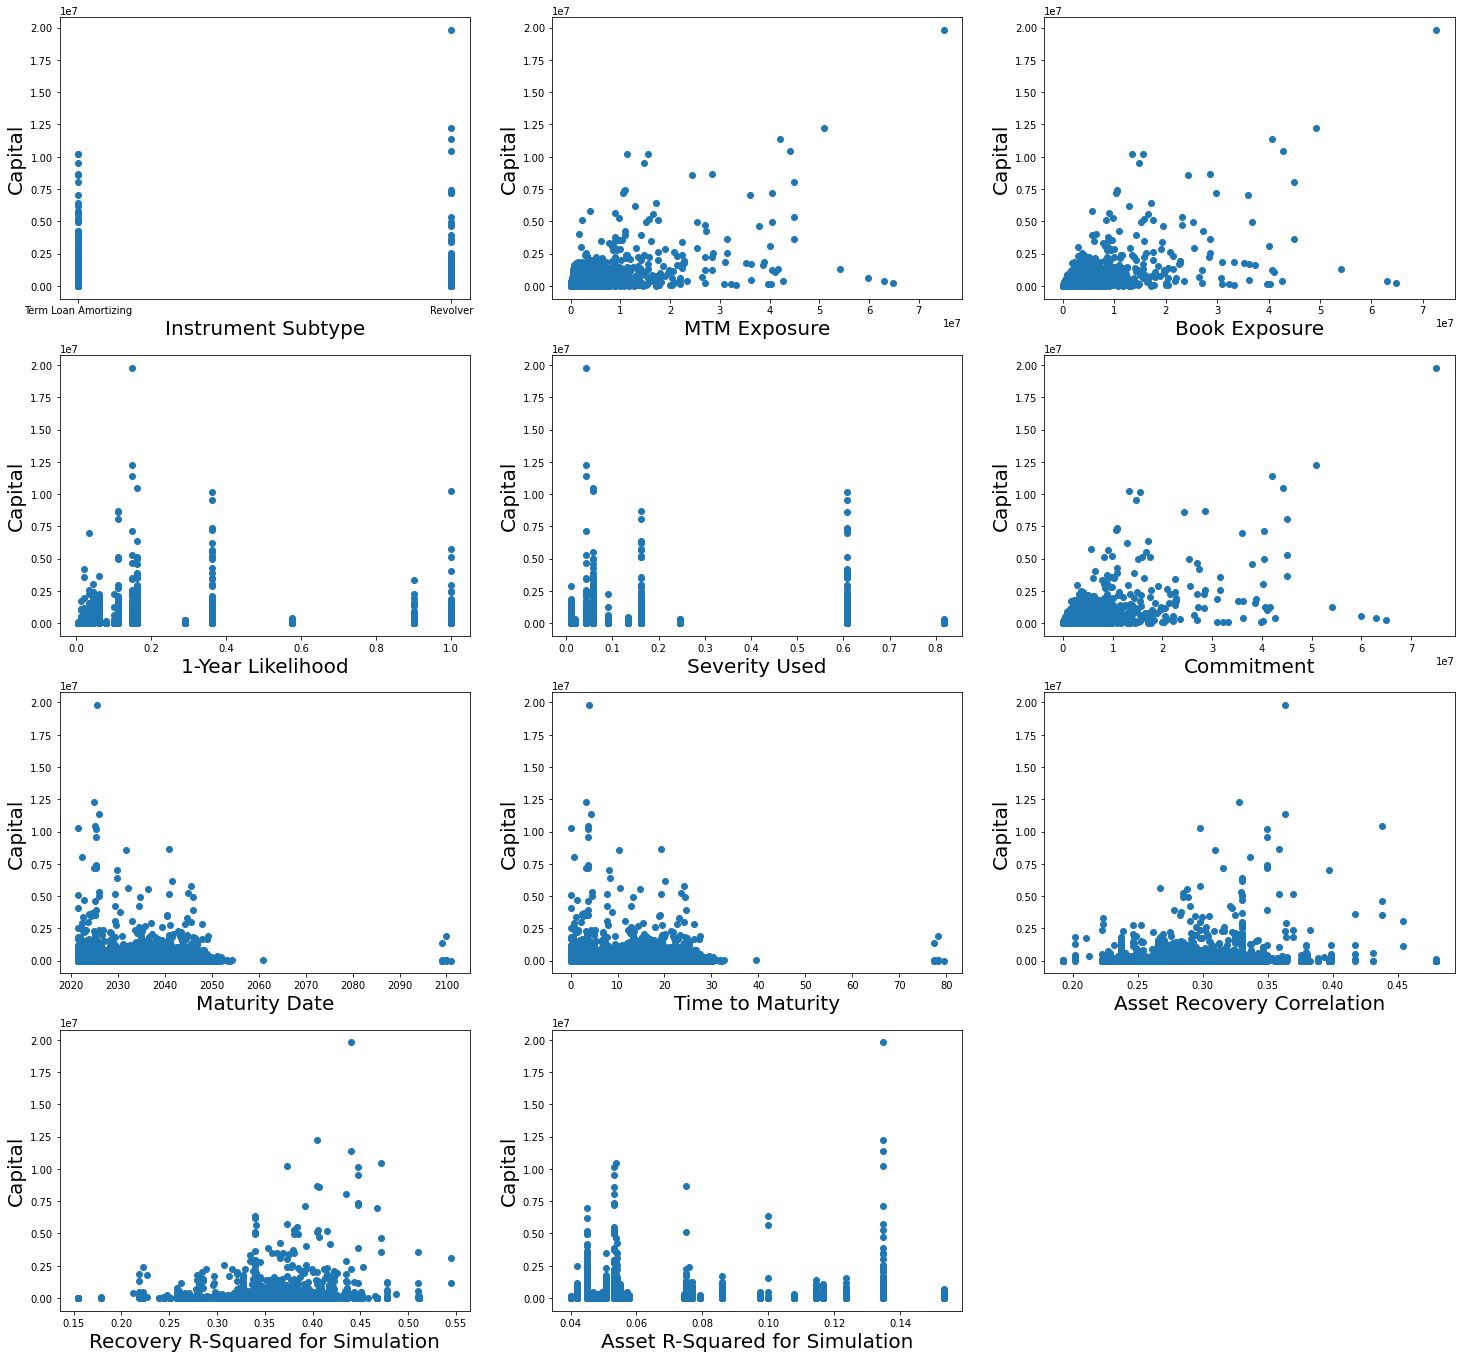

In [14]:
#Plot the relation between features and target 
plt.figure(figsize=(25,30))
plot_number = 1
for i in df.drop('Capital - EL Tail Risk Contribution (Capped)',axis=1).columns:
  if plot_number < 12:
    ax = plt.subplot(5,3,plot_number)
    plt.scatter(df[i],df['Capital - EL Tail Risk Contribution (Capped)'])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Capital',fontsize=20)
  plot_number += 1
plt.show()

**Dropping maturity date as it is similar to 'Time to Maturity' column considering scatter plot**

In [15]:
df.drop('Maturity Date',axis=1,inplace=True)

**Heatmap of correlation**

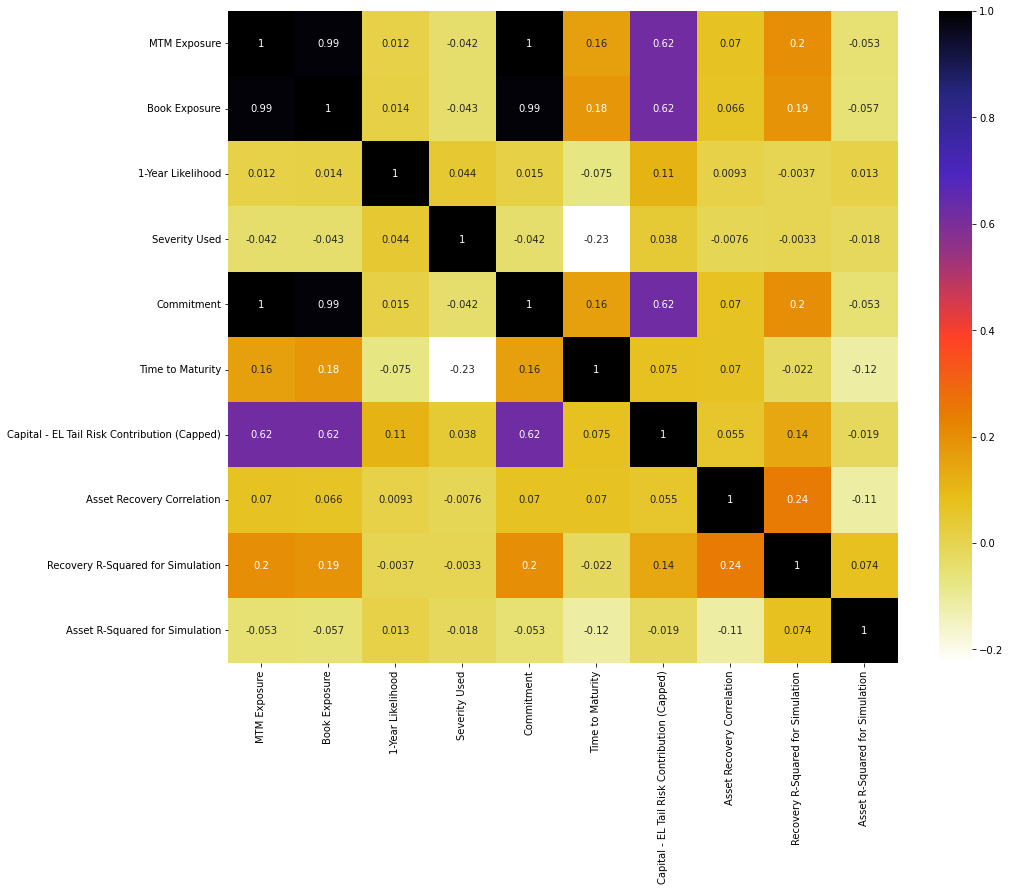

In [16]:
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Feature Scaling

**As catergorical column can be converted into numerical to use it as feature**

**Converting 'Instrument Subtype' datatype to integer using LabelEncoder**

In [17]:
label_encoder = LabelEncoder() #Create object of Label Encoder
df['Instrument Subtype'] = label_encoder.fit_transform(df['Instrument Subtype']) #Label numbers to the category
print(df['Instrument Subtype'].dtype)

int64


**Finding outliers**

In [18]:
#List the outliers
outliers = df['Time to Maturity'].sort_values(ascending=False).head(10)
outliers

77105     79.427789
7290      78.335387
29809     78.335387
50666     78.335387
149255    78.335387
124240    77.420945
12502     77.420945
46052     77.420945
135460    77.420945
1303      39.430527
Name: Time to Maturity, dtype: float64

**Finding index of outliers**

In [19]:
#List the outliers
outlier_index = df['Time to Maturity'].sort_values(ascending=False).head(9).index
outlier_index

Int64Index([77105, 7290, 29809, 50666, 149255, 124240, 12502, 46052, 135460], dtype='int64')

**Dropping outliers using previous index**

In [20]:
df.drop(outlier_index,axis=0,inplace=True) #Drops the outliers

### Feature Selection

**Split the dataset to use in selection methods**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Capital - EL Tail Risk Contribution (Capped)',axis=1), 
                                   df['Capital - EL Tail Risk Contribution (Capped)'],
                                   test_size = 0.25, random_state = 42) 

**Pearson Correlation**

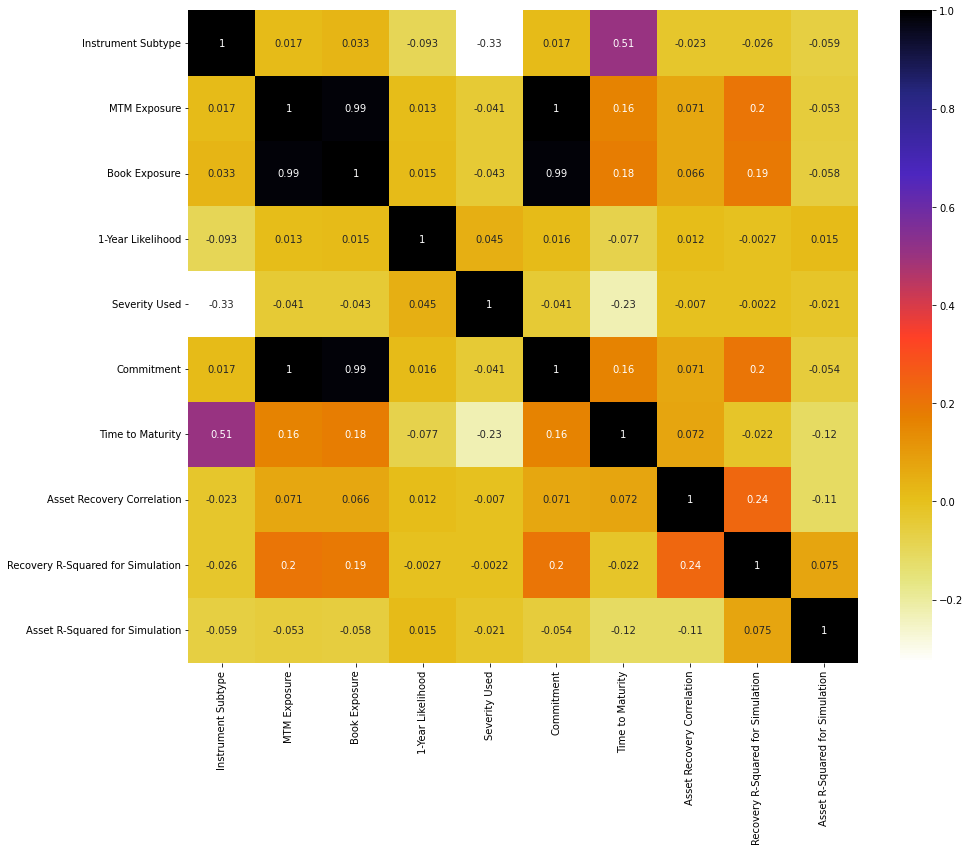

In [22]:
#Plot the heatmap of correlation 
plt.figure(figsize=(15,12))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

**Mutual Information Method**

In [23]:
most_mutual = mutual_info_regression(x_train,y_train)
most_mutual

array([0.02265779, 0.74491461, 0.78165672, 0.19251657, 0.13163009,
       0.73165197, 0.32880643, 0.02840822, 0.03323585, 0.07741829])

In [24]:
most_mutual = pd.Series(most_mutual)
most_mutual.index = x_train.columns
most_mutual.sort_values(ascending = False)

Book Exposure                        0.781657
MTM Exposure                         0.744915
Commitment                           0.731652
Time to Maturity                     0.328806
1-Year Likelihood                    0.192517
Severity Used                        0.131630
Asset R-Squared for Simulation       0.077418
Recovery R-Squared for Simulation    0.033236
Asset Recovery Correlation           0.028408
Instrument Subtype                   0.022658
dtype: float64

**Plots the bar graph of most mutual variables in descending order**

<AxesSubplot:>

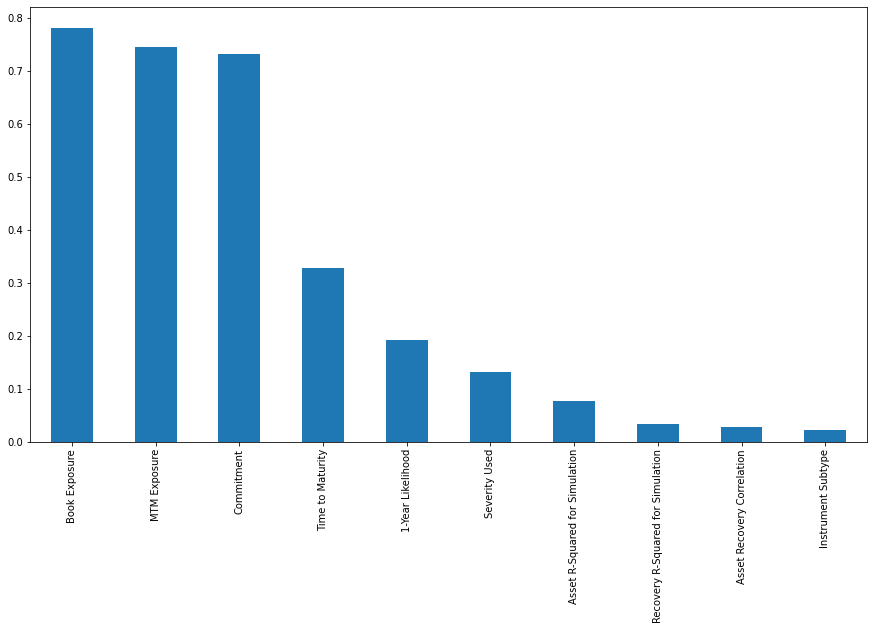

In [25]:
most_mutual.sort_values(ascending=False).plot.bar(figsize=(15,8))

**I considered the features with an 80% threshold value and compared evaluation metrics with the model having all features but the results are insignificant therefore I have implemented the below models with all the features.**

# Model Implementation 

**Input features and target variable**

In [26]:
X = df.drop(['Capital - EL Tail Risk Contribution (Capped)'],axis=1)
Y = df['Capital - EL Tail Risk Contribution (Capped)']

**Splitting all features and target variable**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)

**Function creates pipeline comprises of standard scaler, pca and model to transform, fit and evaluate the model.**

In [28]:
def pca(model):
    _sc = StandardScaler()
    _pca = PCA(0.95)
    pca_model = Pipeline([
        ('std_scaler', _sc),
        ('pca', _pca),
        ('regressor', model)
    ])
    pca_model.fit(X_train, Y_train)
    Y_pred = pca_model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2score = r2_score(Y_test, Y_pred)
    print()
    print(f'MAE: {mae}')
    print(f'R2_Score: {r2score}')

**Creates dictionary of models and perform PCA.**

In [29]:
pool = {"Decision Tree":DecisionTreeRegressor(random_state=44), 
        "Random Forest":RandomForestRegressor(random_state=26), 
        "Gradient Boosting": GradientBoostingRegressor(random_state=42), 
        "XG Boost":XGBRegressor(objective="reg:squarederror",random_state=42), 
        "Extra Trees": ExtraTreesRegressor(random_state=40)}
for key, values in pool.items():
    print(key)
    pca(values)
    print()

Decision Tree

MAE: 7376.935851151989
R2_Score: 0.6570944174829706

Random Forest

MAE: 6210.100751862095
R2_Score: 0.6428928084551235

Gradient Boosting

MAE: 9800.923717284028
R2_Score: 0.6040603485522932

XG Boost

MAE: 6883.98468372159
R2_Score: 0.570195428738982

Extra Trees

MAE: 6138.060466104169
R2_Score: 0.5567741929176837



## Decision Tree Model Implementation

**Create object of model then fit the features**

In [30]:
dt = DecisionTreeRegressor(random_state=44, max_features=5)
dt = dt.fit(X_train,Y_train)

<BarContainer object of 10 artists>

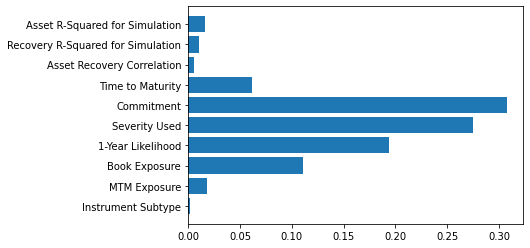

In [31]:
plt.barh(X_train.columns, dt.feature_importances_)

**Model Evaluation**

In [32]:
Y_pred = dt.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

MAE: 5422.166604351229
R2_Score: 0.8203287156814622


## RandomForest Model Implementation

**Create object of model then fit the features**

In [33]:
rf = RandomForestRegressor(max_features=8, random_state=44)
rf = rf.fit(X_train,Y_train)

<BarContainer object of 10 artists>

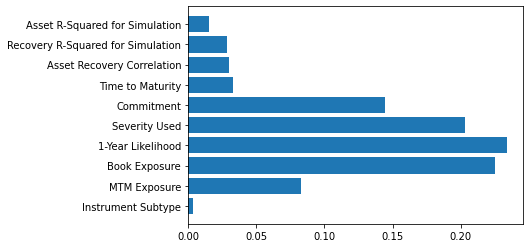

In [34]:
plt.barh(X_train.columns, rf.feature_importances_)

**Model Evaluation**

In [35]:
Y_pred = rf.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

MAE: 4140.7741248078
R2_Score: 0.730427604501453


## Gradient Boosting Model Implementation

**Create object of model then fit the features**

In [36]:
gb = GradientBoostingRegressor(random_state=42)
gb = gb.fit(X_train,Y_train)

**Model Evaluation**

In [37]:
Y_pred = gb.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

MAE: 6948.007073529224
R2_Score: 0.663016203772169


## XGBoost Model Implementation

**Create object of model then fit the features**

In [38]:
xgb = XGBRegressor(objective="reg:squarederror",random_state=42)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Model Evaluation**

In [39]:
Y_pred = xgb.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

MAE: 4428.245278056318
R2_Score: 0.6402125319875128


## ExtraTreesClassifier Implementation

**Create object of model then fit the features**

In [40]:
ext = ExtraTreesRegressor(random_state=40)
ext = ext.fit(X_train,Y_train)

**Model Evaluation**

In [41]:
Y_pred = ext.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

MAE: 3904.1024670342663
R2_Score: 0.7557980974116434


## Neural Network

In [42]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [43]:
NN = Sequential([
    layers.Dense(10, input_dim=x_train_scaled.shape[1] ,kernel_initializer='normal', activation='relu'),
    layers.Dense(5, kernel_initializer='normal', activation='relu'),
    layers.Dense(3, kernel_initializer='normal', activation='relu'),
    layers.Dense(1, kernel_initializer='normal', activation='linear'),
])
NN.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'accuracy'])
history = NN.fit(x_train_scaled.values, Y_train.values, epochs=50, batch_size=32, validation_split=0.2)

Metal device set to: Apple M1
Epoch 1/50


2022-04-04 22:28:50.461362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-04 22:28:50.461507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-04 22:28:50.563041: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  12/2841 [..............................] - ETA: 13s - loss: 46277378048.0000 - mae: 24527.5684 - accuracy: 0.0052     

2022-04-04 22:28:50.772374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2841/2841 [==============================] - ETA: 0s - loss: 14010562560.0000 - mae: 14983.9033 - accuracy: 6.8211e-04

2022-04-04 22:29:03.767602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2841/2841 [==============================] - 15s 5ms/step - loss: 14010562560.0000 - mae: 14983.9033 - accuracy: 6.8211e-04 - val_loss: 21040007168.0000 - val_mae: 15928.3379 - val_accuracy: 0.0000e+00
Epoch 2/50
2841/2841 [==============================] - 15s 5ms/step - loss: 13598690304.0000 - mae: 13633.2256 - accuracy: 0.0000e+00 - val_loss: 19900180480.0000 - val_mae: 14693.5059 - val_accuracy: 0.0000e+00
Epoch 3/50
2841/2841 [==============================] - 14s 5ms/step - loss: 12768943104.0000 - mae: 13749.8174 - accuracy: 0.0000e+00 - val_loss: 18444404736.0000 - val_mae: 16036.7695 - val_accuracy: 0.0000e+00
Epoch 4/50
2841/2841 [==============================] - 14s 5ms/step - loss: 11807077376.0000 - mae: 15866.2432 - accuracy: 0.0000e+00 - val_loss: 16718156800.0000 - val_mae: 18148.3340 - val_accuracy: 0.0000e+00
Epoch 5/50
2841/2841 [==============================] - 14s 5ms/step - loss: 11068835840.0000 - mae: 17099.4512 - accuracy: 0.0000e+00 - val_loss: 15383571456.

In [44]:
Y_pred = NN.predict(x_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)
print(f'MAE: {mae}')
print(f'R2_Score: {r2score}')

2022-04-04 22:40:43.374737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


MAE: 13398.218034984673
R2_Score: 0.4635377670949046


# Final export of results

**Import development and test dataset**

In [45]:
dev_data = pd.read_csv('train_bank_data.csv')
test_data = pd.read_csv('test_bank_data.csv')

**Dropping null values and create a copy of development dataframe**

In [46]:
dev_data.dropna(subset=['Instrument Subtype'],inplace=True)
dev_df = dev_data.copy(deep=True)

**Dropping null values and create a copy of test dataframe**

In [47]:
test_data.dropna(subset=['Instrument Subtype'],inplace=True)
test_df = test_data.copy(deep=True)

**Conversion of categorical column to integer datatype using LabelEncoder**

In [48]:
label_encoder = LabelEncoder() #Create object of Label Encoder
dev_df['Instrument Subtype'] = label_encoder.fit_transform(dev_df['Instrument Subtype']) #Label numbers to category
test_df['Instrument Subtype'] = label_encoder.fit_transform(test_df['Instrument Subtype'])

**Selecting input features to predict using model**

In [49]:
dev_df = dev_df[['Instrument Subtype', 'MTM Exposure', 'Book Exposure', '1-Year Likelihood',
            'Severity Used', 'Commitment', 'Time to Maturity', 'Asset Recovery Correlation',
            'Recovery R-Squared for Simulation', 'Asset R-Squared for Simulation']]
test_df = test_df[['Instrument Subtype', 'MTM Exposure', 'Book Exposure', '1-Year Likelihood',
            'Severity Used', 'Commitment', 'Time to Maturity', 'Asset Recovery Correlation',
            'Recovery R-Squared for Simulation', 'Asset R-Squared for Simulation']]

## Model Results

**Predict the target variable, evaluate capitalization rate and export it to csv format**

In [50]:
def export_csv(model_name, model):
    target_data = model.predict(dev_df)
    dev_data['Capital - EL Tail Risk Contribution (Capped)'] = target_data
    dev_data['Capitalization Rate - EL Tail Risk Contribution'] = target_data / dev_data['MTM Exposure']
    dev_data.to_csv(f'Train_{model_name}.csv')
    
    target_test_data = model.predict(test_df)
    test_data['Capital - EL Tail Risk Contribution (Capped)'] = target_test_data
    test_data['Capitalization Rate - EL Tail Risk Contribution'] = target_test_data / test_data['MTM Exposure']
    test_data.to_csv(f'Test_{model_name}.csv')

In [51]:
model_pool = {'Decision_Tree':dt,'Random_Forest':rf,'Gradient_Boosting':gb,'XG_Boost':xgb,'Extra_Tree':ext}
for key, value in model_pool.items():
    export_csv(key, value)